In [1]:
from tensorflow import keras 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2,os
from keras.layers import LeakyReLU
plt.style.use('default')

Using TensorFlow backend.


In [2]:
path1="/Users/draculalemon/Downloads/facedetectonCNN/train"
path2="/Users/draculalemon/Downloads/facedetectonCNN/test"
path3="/Users/draculalemon/Downloads/facedetectonCNN/val"

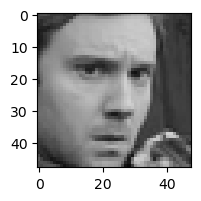

In [3]:
path="/Users/draculalemon/Downloads/facedetectonCNN/train/0/0.png"
img_sample=image.load_img(path)
plt.figure(figsize=(15,2))
plt.imshow(img_sample)

In [4]:
#checking the shape
cv2.imread(path).shape

(48, 48, 3)

In [5]:
#looping through every picture in the folder data
X_train=list()
y_train=list()

for folder in os.listdir(path1):
    folder_path=os.path.join(path1,folder)
    for file in os.listdir(folder_path):
        file_path=os.path.join(folder_path,file)
        img=cv2.imread(file_path)
        img=cv2.resize(img,(32,32)).tolist()
        X_train.append(img)
        y_train.append(folder)
X_train=np.array(X_train)
y_train=np.array(y_train)
           

In [6]:
os.listdir(path1)

['0', '6', '1', '4', '3', '2', '5']

In [7]:
X_test=list()
y_test=list()

for folder2 in os.listdir(path2):
    folder_path1=os.path.join(path2,folder2)
    for file2 in os.listdir(folder_path1):
        file_path2=os.path.join(folder_path1,file2)
        img2=cv2.imread(file_path2)
        img2=cv2.resize(img2,(32,32)).tolist()
        X_test.append(img2)
        y_test.append(folder2)
X_test=np.array(X_test)
y_test=np.array(y_test)
           

In [8]:
X_val=list()
y_val=list()

for folder3 in os.listdir(path3):
    folder_path3=os.path.join(path3,folder3)
    for file3 in os.listdir(folder_path3):
        file_path3=os.path.join(folder_path3,file3)
        img3=cv2.imread(file_path3)
        img3=cv2.resize(img3,(32,32)).tolist()
        X_val.append(img3)
        y_val.append(folder3)
#converting it to array
X_val=np.array(X_val)
y_val=np.array(y_val)    

In [10]:
#converting the data into int
y_train.dtype="int32"

In [11]:
y_val.dtype="int32"

In [13]:
# cnn with maxpooling workingn base cv2d
cnn_model1=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",                                 
                                        input_shape=(32,32,3)),tf.keras.layers.MaxPool2D(2,2),
                                        #1
                                        tf.keras.layers.Conv2D(32,(4,4),activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                       
                                        tf.keras.layers.Conv2D(128,(5,5),activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #flatten layes
                                        tf.keras.layers.Flatten(),
                                        #dense layers
                                        tf.keras.layers.Dense(512,activation='relu'),
                                        tf.keras.layers.Dense(300,activation='relu'),
                                        tf.keras.layers.Dense(200,activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
                                        ##dense2
                                        tf.keras.layers.Dense(55,activation='softmax')
                                        ])

2022-03-14 13:12:18.193054: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-14 13:12:18.193486: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [14]:
#compiling the dataset
cnn_model1.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [15]:
y_train

array([48, 48, 48, ..., 53, 53, 53], dtype=int32)

In [17]:
model_fit1=cnn_model1.fit(X_train,y_train,epochs=20,
                        validation_data=(X_val,y_val))

Train on 28709 samples, validate on 3589 samples
Epoch 1/20
28709/28709 [==============================] - 54s 2ms/sample - loss: 1.8119 - accuracy: 0.3090 - val_loss: 1.5962 - val_accuracy: 0.3731
Epoch 2/20
28709/28709 [==============================] - 54s 2ms/sample - loss: 1.5795 - accuracy: 0.3885 - val_loss: 1.5284 - val_accuracy: 0.4093
Epoch 3/20
28709/28709 [==============================] - 53s 2ms/sample - loss: 1.5075 - accuracy: 0.4184 - val_loss: 1.5167 - val_accuracy: 0.4143
Epoch 4/20
28709/28709 [==============================] - 52s 2ms/sample - loss: 1.4522 - accuracy: 0.4442 - val_loss: 1.4719 - val_accuracy: 0.4489
Epoch 5/20
28709/28709 [==============================] - 51s 2ms/sample - loss: 1.3808 - accuracy: 0.4742 - val_loss: 1.4344 - val_accuracy: 0.4567
Epoch 6/20
28709/28709 [==============================] - 52s 2ms/sample - loss: 1.3153 - accuracy: 0.5010 - val_loss: 1.3935 - val_accuracy: 0.4687
Epoch 7/20
28709/28709 [==============================] -

In [20]:
y_test.dtype="int32"

In [25]:
model_evaluation=cnn_model1.evaluate(X_test,y_test)
print(model_evaluation)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.5280335612468448, 0.49428812]


# using keras tuner to tune the model

In [26]:
import keras_tuner as kt

In [78]:
def cnn_hypertune(hp):
    #initilize the sequential api and start stacking the layers
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(32,32,3)))
    #tune the number of units in the first dense layers
    #choose an optimal value between 32-512
    hp_units=hp.Int('cnn_units',min_value=32,max_value=512,step=32)
    model.add(keras.layers.Dense(units=hp_units,
                                 activation=tf.keras.layers.LeakyReLU(alpha=0.01),
                                 name='dense_one'))
    #adding next layes
    model.add(keras.layers.Dropout(0.2))
    #last dense layers
    model.add(keras.layers.Dense(55,activation="softmax"))
    
    #tuning the learnig rate for the optimizer
    #choosing an optimal values
    hp_learning_rate=hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

In [79]:
X_train.shape

(28709, 32, 32, 3)

In [80]:
tuners=kt.Hyperband(cnn_hypertune,objective='val_accuracy',max_epochs=15)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [81]:
#hypertunning settings
tuners.search_space_summary()

Search space summary
Default search space size: 2
cnn_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [82]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [83]:
#perform hypertunning
tuners.search(X_train,y_train,epochs=15,validation_split=0.2,callbacks=[stop_early])

Trial 31 Complete [00h 00m 48s]
val_accuracy: 0.00017415534239262342

Best val_accuracy So Far: 0.43207940459251404
Total elapsed time: 00h 23m 44s
INFO:tensorflow:Oracle triggered exit
